In [1]:
import numpy as np
import random
import torch
import torch.nn as nn
import torchvision.utils as vutils
import torchvision.datasets as dset
import torchvision.transforms as transforms
import matplotlib.pylab as plt

import glob
from glob import glob
import nibabel as nb

In [2]:
if torch.cuda.is_available():
    print("The code will run on GPU.")
else:
    print("The code will run on CPU. Go to Edit->Notebook Settings and choose GPU as the hardware accelerator")
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
torch.cuda.manual_seed_all(42)

The code will run on GPU.


In [ ]:
def save_models(G_A2B, G_B2A, D_A, D_B, name):

  torch.save(G_A2B, name+"_G_A2B.pt")
  torch.save(G_B2A,  name+"_G_B2A.pt")
  torch.save(D_A,  name+"_D_A.pt")
  torch.save(D_B, name+"_D_B.pt")

def load_models( name):
  G_A2B=torch.load(name+'_G_A2B.pt', map_location=torch.device('cpu'))
  G_B2A=torch.load(name+"_G_B2A.pt",map_location=torch.device('cpu'))
  D_A=torch.load(name+"_D_A.pt", map_location=torch.device('cpu'))
  D_B=torch.load(name+"_D_B.pt", map_location=torch.device('cpu'))
  return G_A2B, G_B2A, D_A, D_B

In [201]:
G_A2B, G_B2A, D_A, D_B = load_models('final_patches')

In [193]:
# path = r'C:\Users\Xiaowei\Desktop\Clara\CycleGAN\Datasets\skull_dataset\test'
# dataset_mri = torch.load(path+'\mri_dataset.pt')
# dataset_sos = torch.load(path+'\sos_dataset.pt')
# test_mris = []
# test_soss = []
# ns = []
# count = 0
# while count < 50:
#     n = random.choice([x for x in range(dataset_mri.shape[0])])
#     if n not in ns:
#         ns.append(n)
#         test_mris.append(dataset_mri[n,:,:,0])
#         test_soss.append(dataset_sos[n,:,:,0])
#         count += 1
#         print('x', end="")
# print('')
# print(len(test_mris))
import os
test_mris = []
test_soss = []
ns = []
count = 0
while count < 100:
    n = random.choice(os.listdir(r"C:\Users\Xiaowei\Desktop\Clara\CycleGAN\Datasets\same_patch_dataset\test\A")).split('.')[0].split('g')[1]
    if n not in ns:
        ns.append(n)
        test_mris.append(plt.imread(r'C:\Users\Xiaowei\Desktop\Clara\CycleGAN\Datasets\same_patch_dataset\test\A\mri_img'+str(n)+'.png'))
        test_soss.append(plt.imread(r'C:\Users\Xiaowei\Desktop\Clara\CycleGAN\Datasets\same_patch_dataset\test\B\sos_img'+str(n)+'.png'))
        count += 1
        print('x', end="")
print('')#

print(len(test_mris))

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
100


In [196]:
path = r'C:\Users\Xiaowei\Desktop\Clara\CycleGAN\Datasets\same_patch_dataset\train'
dataset_mri = torch.load(path+'\mri_dataset.pt')
dataset_sos = torch.load(path+'\sos_dataset.pt')
print(len(dataset_mri))
test_mris = dataset_mri[:50][:,:,:,0]
test_soss = dataset_sos[:50][:,:,:,0]

3980


In [45]:
test_mris.shape

torch.Size([50, 64, 64])

In [202]:
test_fake_mris = []
test_fake_soss = []
test_rec_mris = []
test_rec_soss = []

G_A2B.to(device)
G_B2A.to(device)
D_A.to(device)
D_B.to(device)
for i in range(len(test_mris)):
    real_mri = torch.Tensor(test_mris[i]).unsqueeze(0).unsqueeze(0)
    fake_sos = G_A2B(real_mri.to(device)).cpu().detach().numpy()
    rec_mri = G_B2A(torch.Tensor(fake_sos).to(device)).cpu().detach().numpy()

    real_sos = torch.Tensor(test_soss[i]).unsqueeze(0).unsqueeze(0)
    fake_mri = G_B2A(real_sos.to(device)).cpu().detach().numpy()
    rec_sos = G_A2B(torch.Tensor(fake_mri).to(device)).cpu().detach().numpy()

    test_fake_mris.append(fake_mri)
    test_fake_soss.append(fake_sos)
    test_rec_mris.append(rec_mri)
    test_rec_soss.append(rec_sos)

    with torch.no_grad():
        real_mri.detach().cpu()
        real_sos.detach().cpu()


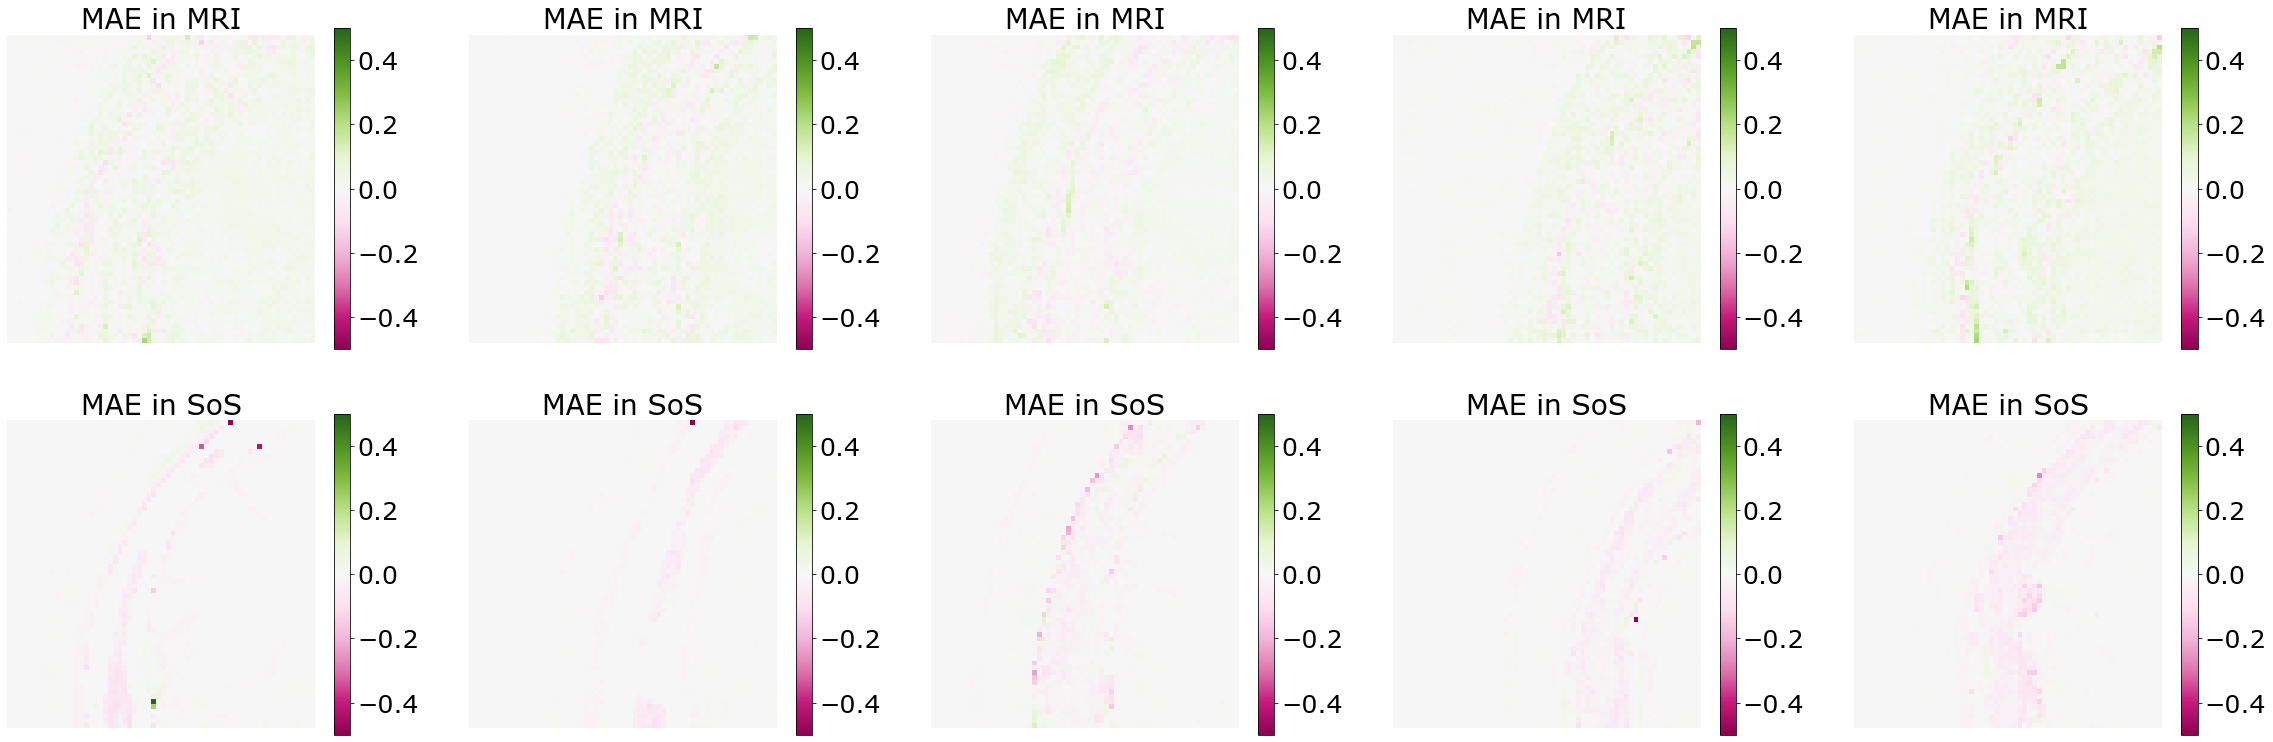

In [126]:
plt.subplots(2,5,figsize=(40,13))
for i in range(1,6):
    plt.subplot(2,5,i)
    plt.imshow(test_mris[i-1]-test_rec_mris[i-1][0,0,:,:], cmap='PiYG'); plt.axis('off'); plt.clim(-0.5,0.5)
    plt.colorbar().ax.tick_params(labelsize=25)
    plt.title('MAE in MRI', fontsize=28)
    plt.subplot(2,5,i+5)
    plt.imshow(test_soss[i-1]-test_rec_soss[i-1][0,0,:,:], cmap='PiYG'); plt.axis('off'); plt.clim(-0.5,0.5)
    plt.colorbar().ax.tick_params(labelsize=25)
    plt.title('MAE in SoS', fontsize=28)

In [78]:
means = []
# print(len(test_soss))
for i in range(len(test_soss)):
    temp = np.mean(np.array(np.abs(np.array(test_soss[i])-np.array(test_fake_soss[i][0,0,:,:]))))
    # print(temp)
    means.append(temp)
np.mean(means)

0.06554858

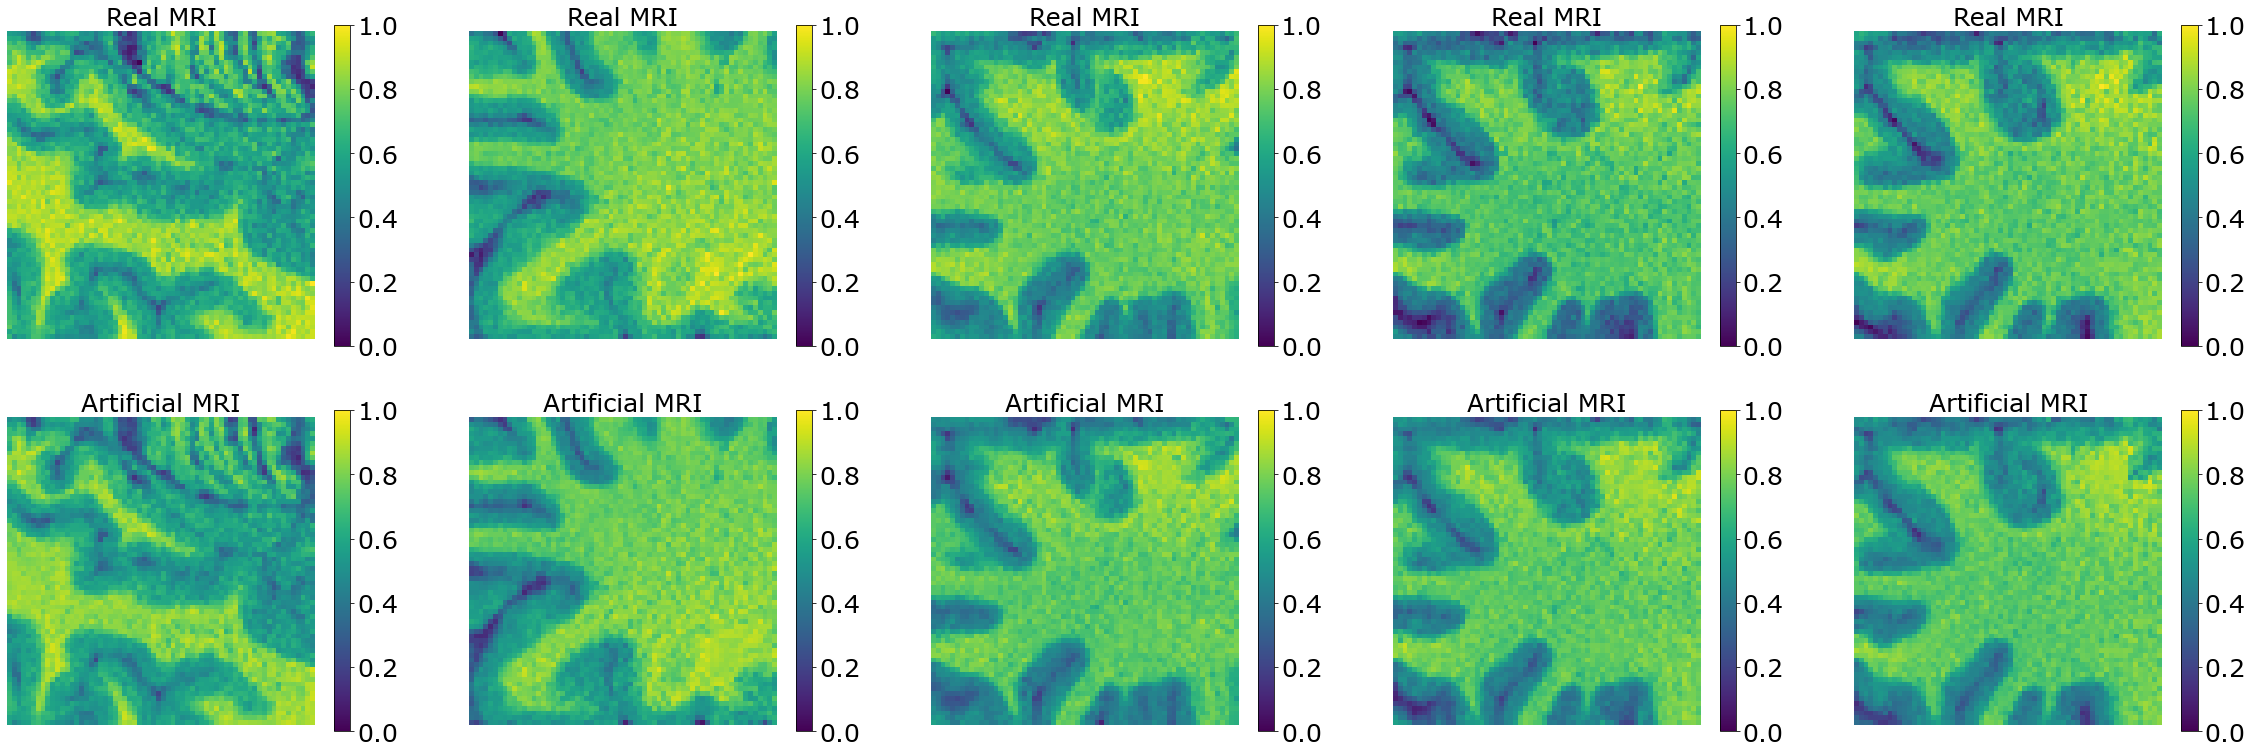

In [169]:

plt.subplots(2,5, figsize=(40,13))
count = 0
for i in range(1,6):
    plt.subplot(2,5,i)
    plt.imshow(test_mris[count]);plt.axis('off')
    plt.colorbar().ax.tick_params(labelsize=25)
    plt.clim(0, 1);
    plt.title('Real MRI', fontsize=25)
    plt.subplot(2,5,i+5)
    plt.imshow(test_rec_mris[count][0,0,:,:]);plt.axis('off')
    plt.colorbar().ax.tick_params(labelsize=25)
    plt.clim(0,1);
    plt.title('Artificial MRI', fontsize=25)
    count +=1

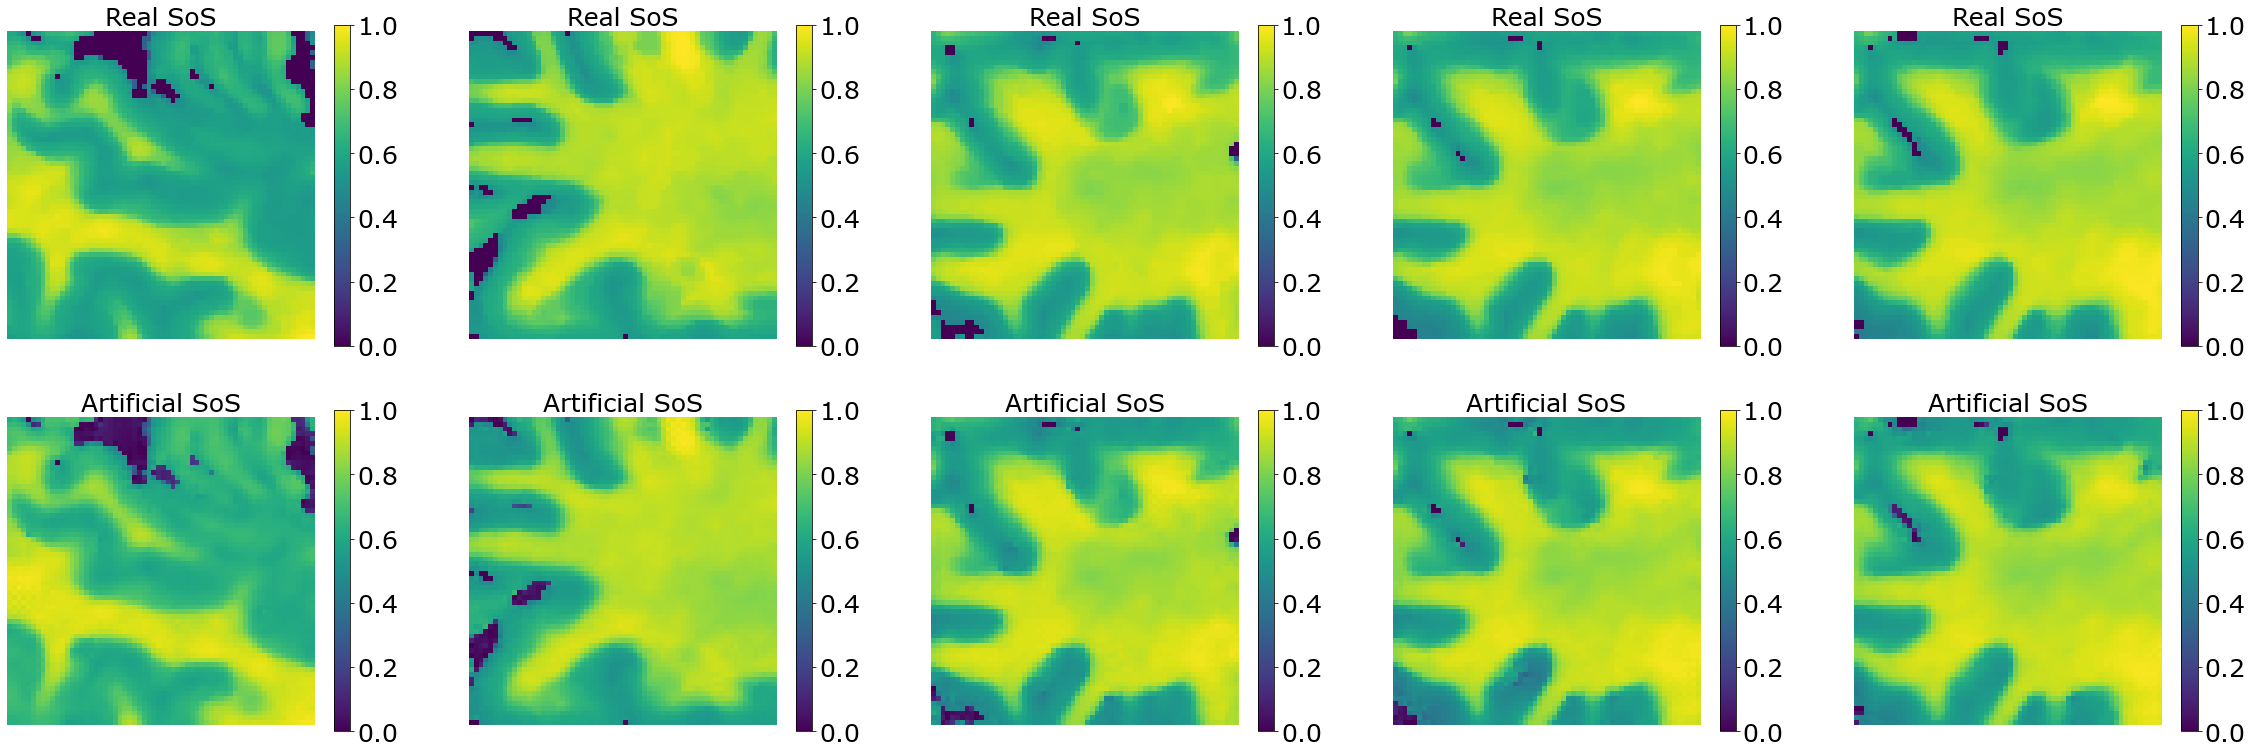

In [170]:

plt.subplots(2,5, figsize=(40,13))
count = 0
for i in range(1,6):
    plt.subplot(2,5,i)
    plt.imshow(test_soss[count]);plt.axis('off')
    plt.colorbar().ax.tick_params(labelsize=25)
    plt.clim(0, 1);
    plt.title('Real SoS', fontsize=25)
    plt.subplot(2,5,i+5)
    plt.imshow(test_rec_soss[count][0,0,:,:]);plt.axis('off')
    plt.colorbar().ax.tick_params(labelsize=25)
    plt.clim(0,1);
    plt.title('Artificial SoS', fontsize=25)
    count +=1

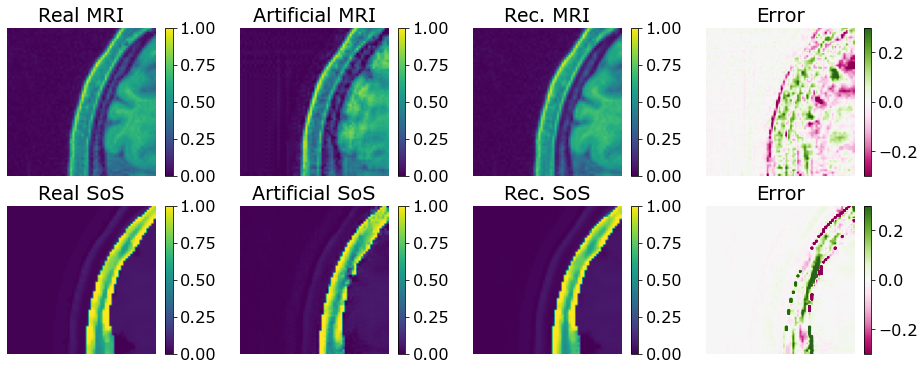

In [204]:
n=3
plt.subplots(2,4,figsize=(16,6));
plt.subplot(2,4,1);plt.imshow(test_mris[n]); plt.title('Real MRI'); plt.colorbar(); plt.clim(0,1); plt.axis('off')
plt.subplot(2,4,2);plt.imshow(test_fake_mris[n][0,0,:,:]); plt.title('Artificial MRI'); plt.colorbar(); plt.clim(0,1); plt.axis('off')
plt.subplot(2,4,3);plt.imshow(test_rec_mris[n][0,0,:,:]); plt.title('Rec. MRI'); plt.colorbar(); plt.clim(0,1); plt.axis('off')
plt.subplot(2,4,4);plt.imshow(test_mris[n]-test_fake_mris[n][0,0,:,:], cmap='PiYG');plt.colorbar();plt.title('Error'); plt.clim(-0.3,0.3); plt.axis('off')
plt.subplot(2,4,5);plt.imshow(test_soss[n]); plt.title('Real SoS'); plt.colorbar(); plt.clim(0,1); plt.axis('off')
plt.subplot(2,4,6);plt.imshow(test_fake_soss[n][0,0,:,:]); plt.title('Artificial SoS'); plt.colorbar(); plt.clim(0,1); plt.axis('off')
plt.subplot(2,4,7);plt.imshow(test_rec_soss[n][0,0,:,:]); plt.title('Rec. SoS'); plt.colorbar(); plt.clim(0,1); plt.axis('off')
plt.subplot(2,4,8);plt.imshow(test_soss[n]-test_fake_soss[n][0,0,:,:], cmap='PiYG');plt.colorbar();plt.title('Error'); plt.clim(-0.3,0.3); plt.axis('off')
plt.show()

(-0.5, 29.5, 29.5, -0.5)

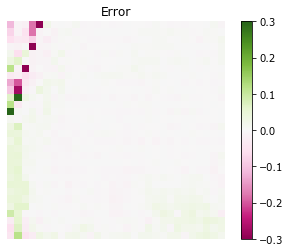

In [45]:
plt.imshow(test_soss[n][-30:,-30:]-test_fake_soss[n][0,0,-30:,-30:], cmap='PiYG');plt.colorbar();plt.title('Error'); plt.clim(-0.3,0.3); plt.axis('off')

In [111]:
def average(lst):
    return sum(lst) / len(lst)

def mse(imageA, imageB):
    # the 'Mean Squared Error' between the two images is the
    # sum of the squared difference between the two images;
    # NOTE: the two images must have the same dimension
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])

    # return the MSE, the lower the error, the more "similar"
    # the two images are
    return err

mri_mses = []
sos_mses = []
for i in range(len(test_mris)):
    mri_mses.append(mse(test_mris[i], test_fake_mris[i][0,0,:,:]))
    sos_mses.append(mse(test_soss[i], test_fake_soss[i][0,0,:,:]))

from skimage.metrics import structural_similarity as ssim
mri_ssim = []
sos_ssim = []
rec_mri_ssim = []
rec_sos_ssim = []
for i in range(len(test_mris)):
    mri_ssim.append(ssim(test_mris[i], test_fake_mris[i][0,0,:,:]))
    sos_ssim.append(ssim(test_soss[i], test_fake_soss[i][0,0,:,:]))
    rec_mri_ssim.append(ssim(test_mris[i], test_rec_mris[i][0,0,:,:]))
    rec_sos_ssim.append(ssim(test_soss[i], test_rec_soss[i][0,0,:,:]))

def PSNR(image1, image2):
    mse = np.mean((image1 - image2) ** 2)
    if(mse == 0):  # MSE is zero means no noise is present in the signal .
                  # Therefore PSNR has no importance.
        return 100
    max_pixel = 255.0
    psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr

mri_psnr = []
sos_psnr = []
rec_mri_psnr = []
rec_sos_psnr = []
for i in range(len(test_mris)):
    mri_psnr.append(PSNR(test_mris[i], test_fake_mris[i][0,0,:,:]))
    sos_psnr.append(PSNR(test_soss[i], test_fake_soss[i][0,0,:,:]))
    rec_mri_psnr.append(PSNR(test_mris[i], test_rec_mris[i][0,0,:,:]))
    rec_sos_psnr.append(PSNR(test_soss[i], test_rec_soss[i][0,0,:,:]))

import sklearn.metrics as metrics
mri_mae = []
sos_mae = []
rec_mri_mae = []
rec_sos_mae = []
for i in range(len(test_mris)):
    mri_mae.append(metrics.mean_absolute_error(test_mris[i], test_fake_mris[i][0,0,:,:]))
    sos_mae.append(metrics.mean_absolute_error(test_soss[i], test_fake_soss[i][0,0,:,:]))
    rec_mri_mae.append(metrics.mean_absolute_error(test_mris[i], test_rec_mris[i][0,0,:,:]))
    rec_sos_mae.append(metrics.mean_absolute_error(test_soss[i], test_rec_soss[i][0,0,:,:]))

In [112]:
print("Evaluation Metrics")
print("Recons.................")
print("MAE: \t MRI: "+str(np.mean(rec_mri_mae)))
print("\t SoS: "+str(np.mean(rec_sos_mae)))
# print("MSE: \t MRI: "+str(np.mean(rec_mri_mses)))
# print("\t SoS: "+str(np.mean(rec_sos_mses)))
print("PSNR: \t MRI: "+str(np.mean(rec_mri_psnr)))
print("\t SoS: "+str(np.mean(rec_sos_psnr)))
print("SSIM: \t MRI: "+str(np.mean(rec_mri_ssim)))
print("\t SoS: "+str(np.mean(rec_sos_ssim)))
print("Fakes..................")
print("MAE: \t MRI: "+str(np.mean(mri_mae)))
print("\t SoS: "+str(np.mean(sos_mae)))
print("MSE: \t MRI: "+str(np.mean(mri_mses)))
print("\t SoS: "+str(np.mean(sos_mses)))
print("PSNR: \t MRI: "+str(np.mean(mri_psnr)))
print("\t SoS: "+str(np.mean(sos_psnr)))
print("SSIM: \t MRI: "+str(np.mean(mri_ssim)))
print("\t SoS: "+str(np.mean(sos_ssim)))

Evaluation Metrics
Recons.................
MAE: 	 MRI: 0.020132083
	 SoS: 0.0067028115
PSNR: 	 MRI: 72.2721411547727
	 SoS: 82.32370835560262
SSIM: 	 MRI: 0.9363662217954215
	 SoS: 0.9775379596455198
Fakes..................
MAE: 	 MRI: 0.027168311
	 SoS: 0.022356477
MSE: 	 MRI: 0.007139876515524231
	 SoS: 0.004380964853450609
PSNR: 	 MRI: 69.81449148389477
	 SoS: 72.25021668263466
SSIM: 	 MRI: 0.8757447494267828
	 SoS: 0.9145501176175467


In [113]:
print("Fakes Std.Dev..................")
print("MAE: \t MRI: "+str(np.std(mri_mae)))
print("\t SoS: "+str(np.std(sos_mae)))
print("MSE: \t MRI: "+str(np.std(mri_mses)))
print("\t SoS: "+str(np.std(sos_mses)))
print("PSNR: \t MRI: "+str(np.std(mri_psnr)))
print("\t SoS: "+str(np.std(sos_psnr)))
print("SSIM: \t MRI: "+str(np.std(mri_ssim)))
print("\t SoS: "+str(np.std(sos_ssim)))

Fakes Std.Dev..................
MAE: 	 MRI: 0.010074131
	 SoS: 0.0033994163
MSE: 	 MRI: 0.0022194215580880476
	 SoS: 0.001991706584654821
PSNR: 	 MRI: 1.4107907633606889
	 SoS: 2.2731724689658535
SSIM: 	 MRI: 0.04611304939740721
	 SoS: 0.015650914626429445


In [9]:
from scipy.stats import gaussian_kde

In [146]:
test_fake_mris[0].shape

(1, 1, 64, 64)

In [147]:
brain_mris = []
brain_fake_mris = []
brain_soss= []
brain_fake_soss= []
for i in range(len(test_mris)):
    brain_mris.append(test_mris[i][32:64,32:63])
    brain_fake_mris.append(test_fake_mris[i][0,0,32:64,32:63])
    brain_soss.append(test_soss[i][32:64,32:63])
    brain_fake_soss.append(test_fake_soss[i][0,0,32:64,32:63])

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 1984 and the array at index 1 has size 0

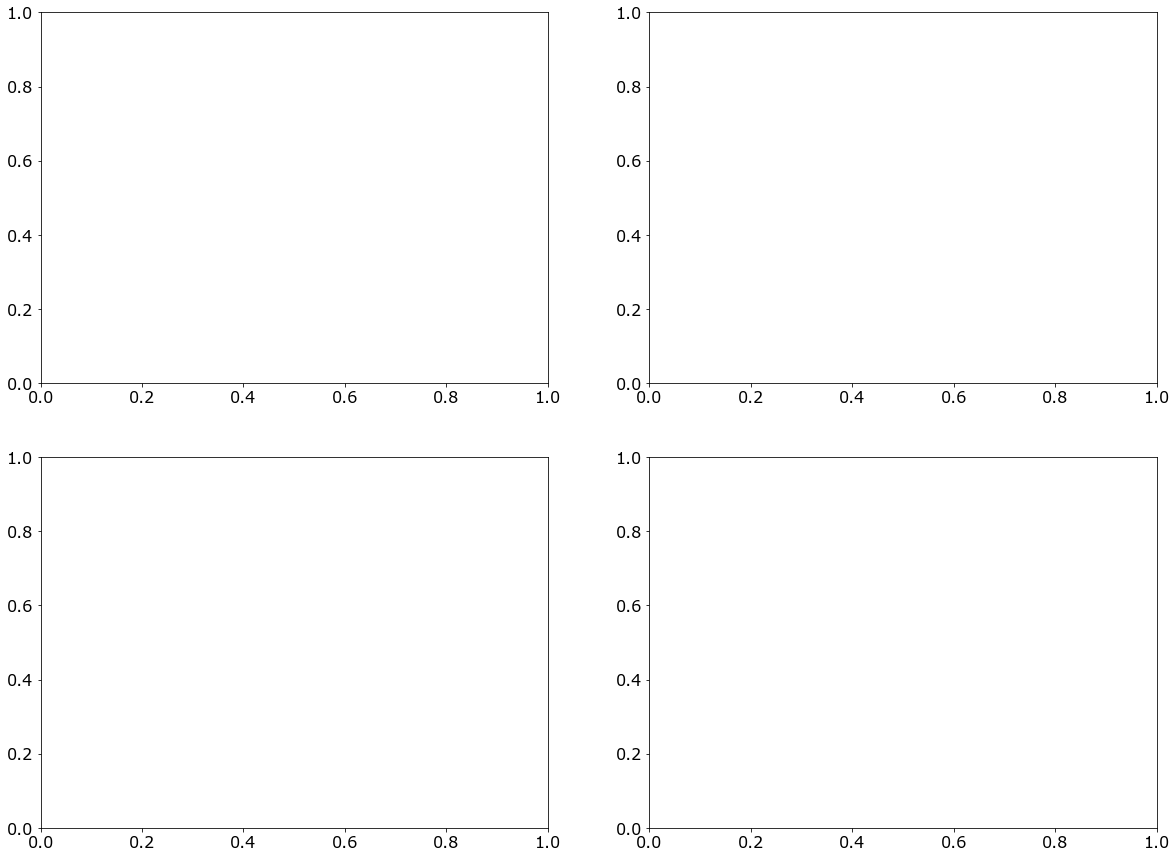

In [131]:
real_mris = np.mean(np.array(test_mris[:]),axis=0).flatten()
real_mris = real_mris/np.max(real_mris)
rec_mris = np.mean(np.array(test_rec_mris[:]),axis=0).flatten()
rec_mris = rec_mris/np.max(rec_mris)
real_soss = np.mean(np.array(test_soss[:]),axis=0).flatten()
rec_soss = np.mean(np.array(test_rec_soss[:]),axis=0).flatten()
fake_soss = np.mean(np.array(test_fake_soss[:]),axis=0).flatten()
fake_mris = np.mean(np.array(test_fake_mris[:]),axis=0).flatten()

plt.rcParams.update({'font.size': 16})
plt.subplots(2,2, figsize=(20,15))
plt.subplot(2,2,1)
xy = np.vstack([real_mris, rec_mris])
z = gaussian_kde(xy)(xy)
plt.scatter(real_mris,rec_mris, c=z)
plt.xlabel('Original MRI', fontsize=21)
plt.ylabel('Reconstructed MRI', fontsize=21)
plt.subplot(2,2,2)
xy = np.vstack([real_soss, rec_soss])
z = gaussian_kde(xy)(xy)
plt.scatter(real_soss,rec_soss, c=z)
plt.xlabel('Original SoS', fontsize=21)
plt.ylabel('Reconstructed SoS', fontsize=21)
plt.subplot(2,2,3)
xy = np.vstack([real_mris, fake_mris])
z = gaussian_kde(xy)(xy)
plt.scatter(real_mris,fake_mris,c=z)
plt.xlabel('Original MRIs', fontsize=21)
plt.ylabel('Fake MRIs', fontsize=21)
plt.subplot(2,2,4)
xy = np.vstack([real_soss, fake_soss])
z = gaussian_kde(xy)(xy)
plt.scatter(real_soss,fake_soss,c=z)
plt.xlabel('Original SoS', fontsize=21)
plt.ylabel('Fake SoS', fontsize=21)

In [148]:
real_mris = np.mean(np.array(brain_mris[:]),axis=0).flatten()
real_soss = np.mean(np.array(brain_mris[:]),axis=0).flatten()
fake_soss = np.mean(np.array(brain_fake_soss[:]),axis=0).flatten()
fake_mris = np.mean(np.array(brain_fake_mris[:]),axis=0).flatten()

In [154]:
np.corrcoef(fake_soss,real_soss)

array([[ 1.       , -0.8681902],
       [-0.8681902,  1.       ]])

# Evaluate skull & the rest separately

In [43]:
t=0;
T = 0.37
fil_m = []
fil_s = []
fake_m = []
fake_s = []
rec_m = []
rec_s = []
m = np.array(test_mris[t]).flatten()
s = np.array(test_soss[t]).flatten()
fm = np.array(test_fake_mris[t][0,0,:,:]).flatten()
fs = np.array(test_fake_soss[t][0,0,:,:]).flatten()
rm = np.array(test_rec_mris[t][0,0,:,:]).flatten()
rs = np.array(test_rec_soss[t][0,0,:,:]).flatten()

skull_fil_m = []
skull_fil_s = []
skull_fake_m = []
skull_fake_s = []
skull_rec_m = []
skull_rec_s = []

for x in range(s.shape[0]):
    if(s[x] < T):
        fil_m.append(m[x])
        fil_s.append(s[x])
        fake_m.append(fm[x])
        fake_s.append(fs[x])
        rec_m.append(rm[x])
        rec_s.append(rs[x])

    if(s[x] > T):
        skull_fil_m.append(m[x])
        skull_fil_s.append(s[x])
        skull_fake_m.append(fm[x])
        skull_fake_s.append(fs[x])
        skull_rec_m.append(rm[x])
        skull_rec_s.append(rs[x])
        


Text(0.5, 1.0, 'Skull')

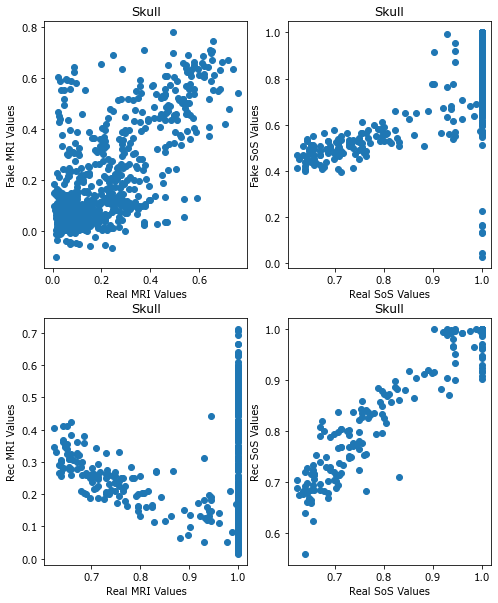

In [48]:
plt.subplots(2,2, figsize=(8,10))
plt.subplot(2,2,1)
plt.scatter(skull_fil_m, skull_fake_m)
plt.xlabel('Real MRI Values')
plt.ylabel('Fake MRI Values')
plt.title('Skull')
plt.subplot(2,2,2)
plt.scatter(skull_fil_s, skull_fake_s)
plt.xlabel('Real SoS Values')
plt.ylabel('Fake SoS Values')
plt.title('Skull')
plt.subplot(2,2,3)
plt.scatter(skull_fil_s, skull_rec_m)
plt.xlabel('Real MRI Values')
plt.ylabel('Rec MRI Values')
plt.title('Skull')
plt.subplot(2,2,4)
plt.scatter(skull_fil_s, skull_rec_s)
plt.xlabel('Real SoS Values')
plt.ylabel('Rec SoS Values')
plt.title('Skull')

Text(0.5, 1.0, 'Brain')

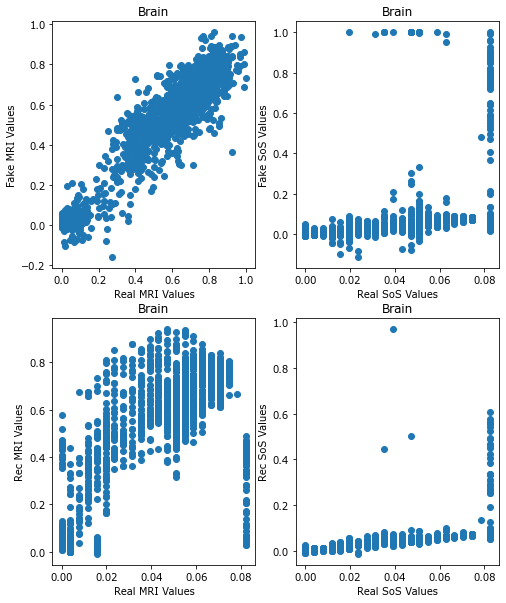

In [49]:
plt.subplots(2,2, figsize=(8,10))
plt.subplot(2,2,1)
plt.scatter(fil_m, fake_m)
plt.xlabel('Real MRI Values')
plt.ylabel('Fake MRI Values')
plt.title('Brain')
plt.subplot(2,2,2)
plt.scatter(fil_s, fake_s)
plt.xlabel('Real SoS Values')
plt.ylabel('Fake SoS Values')
plt.title('Brain')
plt.subplot(2,2,3)
plt.scatter(fil_s, rec_m)
plt.xlabel('Real MRI Values')
plt.ylabel('Rec MRI Values')
plt.title('Brain')
plt.subplot(2,2,4)
plt.scatter(fil_s, rec_s)
plt.xlabel('Real SoS Values')
plt.ylabel('Rec SoS Values')
plt.title('Brain')

In [36]:
test_mris[1]

array([[0.01960784, 0.01568628, 0.03137255, ..., 0.09411765, 0.07450981,
        0.04705882],
       [0.01568628, 0.01960784, 0.01568628, ..., 0.11764706, 0.04313726,
        0.16470589],
       [0.        , 0.00784314, 0.01568628, ..., 0.07450981, 0.07450981,
        0.39607844],
       ...,
       [0.00784314, 0.01176471, 0.01176471, ..., 0.4627451 , 0.3529412 ,
        0.2509804 ],
       [0.00784314, 0.01960784, 0.01568628, ..., 0.28627452, 0.21568628,
        0.1882353 ],
       [0.01176471, 0.01176471, 0.01568628, ..., 0.3137255 , 0.29803923,
        0.3019608 ]], dtype=float32)